![example](images/director_shot.jpeg)

## Microsoft Movie Studio Project

Author: Nat Berryman

## Overview

The head of Microsoft's new movie studio requires data analysis to assist in his decision making on what movies to create. Multiple data sources have been used from Box Office Mojo and IMDB. These data sets were cleaned to ensure the data was analysied effictively to produce results and recommodenations. It was determined that BV was the most successful movie studio while Action/Adventure/Amination genres were the most popular amongst movie-goers. It was also determined the best release month for highest performing movies was June and November. Follwing these results the below actions are strongly recommended.

1. Explore partnership opportunities with existing production studios e.g. Disney partnering with Sony for the Spider-Man movies
2. Creating Action/Adeventure or Animated Adventure movies
3. Ensuring the release dates for the films in June or November.

## Business Problem

The business problem that I set out to solve was, how can Microsoft's venture into the movie making industry be successful?

In order to solve this problem, I intended to find answer for the following questions:
1. What are the highest grossing production studios?
2. What is the highest grossing movie genres?
3. What is the most successful release date patterns?

## Data Understanding

The data used for this analysis was the Title Basics and Title Ratings from IMDB, Movie Gross from Box Office Mojo and Movie Budgets from The Numbers. The sets represent the total movies number of movies released over a determined timeframe, the titles and production studios, the rating scores, primary and sub-genres along with the domestic and world gross revenue. It was identifed that these sets had the data required to make meaningful recommendations to the head of Microsofts movie studio.
***
Questions to consider:
* Where did the data come from, and how do they relate to the data analysis questions?
* What do the data represent? Who is in the sample and what variables are included?
* What is the target variable? - Assistance fromm Hardik
* What are the properties of the variables you intend to use? - Assistance from Hardik
***

In [56]:
# Import standard packages
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import calendar
from matplotlib import rcParams

%matplotlib inline

df_imdb_title_basics = pd.read_csv('./Data/imdb_title_basics.csv')
df_imdb_title_ratings = pd.read_csv('./Data/imdb_title_ratings.csv')
df_tn_movie_budgets = pd.read_csv('./Data/tn.movie_budgets.csv')
df_bom_movie_gross = pd.read_csv('./Data/bom_movie_gross.csv')

In [57]:
# Here you run your code to explore the data
df_imdb_title_basics.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 146144 entries, 0 to 146143
Data columns (total 6 columns):
 #   Column           Non-Null Count   Dtype  
---  ------           --------------   -----  
 0   tconst           146144 non-null  object 
 1   primary_title    146144 non-null  object 
 2   original_title   146123 non-null  object 
 3   start_year       146144 non-null  int64  
 4   runtime_minutes  114405 non-null  float64
 5   genres           140736 non-null  object 
dtypes: float64(1), int64(1), object(4)
memory usage: 6.7+ MB


In [58]:
df_imdb_title_ratings.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 73856 entries, 0 to 73855
Data columns (total 3 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   tconst         73856 non-null  object 
 1   averagerating  73856 non-null  float64
 2   numvotes       73856 non-null  int64  
dtypes: float64(1), int64(1), object(1)
memory usage: 1.7+ MB


In [59]:
df_tn_movie_budgets.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5782 entries, 0 to 5781
Data columns (total 6 columns):
 #   Column             Non-Null Count  Dtype 
---  ------             --------------  ----- 
 0   id                 5782 non-null   int64 
 1   release_date       5782 non-null   object
 2   movie              5782 non-null   object
 3   production_budget  5782 non-null   object
 4   domestic_gross     5782 non-null   object
 5   worldwide_gross    5782 non-null   object
dtypes: int64(1), object(5)
memory usage: 271.2+ KB


In [60]:
df_bom_movie_gross.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3387 entries, 0 to 3386
Data columns (total 5 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   title           3387 non-null   object 
 1   studio          3382 non-null   object 
 2   domestic_gross  3359 non-null   float64
 3   foreign_gross   2037 non-null   object 
 4   year            3387 non-null   int64  
dtypes: float64(1), int64(1), object(3)
memory usage: 132.4+ KB


## Data Preparation

I started by merging all of the data sets into one dataframe which left 1413 entries.
Once merged I dropped irrelevant columns and removed duplidate movie titles.
Then I split out the genres into primary genre columns and sub-genre columns and converted the dates into columns for easier evaluation. After I determined the averagerating and numvotes columns were not relevent, I also removed them. This left me with a workable dataset to assist in making suitable recommendations to the head of Microsfots movie making department.

***
Questions to consider:
* Were there variables you dropped or created?
* How did you address missing values or outliers?
* Why are these choices appropriate given the data and the business problem?
***

In [61]:
# Here you run your code to clean the data
df_imdb = pd.merge(df_imdb_title_basics, df_imdb_title_ratings, on=['tconst'])

In [62]:
df_tn_imdb = pd.merge(df_tn_movie_budgets, df_imdb, left_on='movie', right_on='primary_title')

In [63]:
df_tn_imdb_bom = pd.merge(df_tn_imdb, df_bom_movie_gross, left_on='movie', right_on='title')
df_tn_imdb_bom.head(2)

,id,release_date,movie,production_budget,domestic_gross_x,worldwide_gross,tconst,primary_title,original_title,start_year,runtime_minutes,genres,averagerating,numvotes,title,studio,domestic_gross_y,foreign_gross,year
0,2,"May 20, 2011",Pirates of the Caribbean: On Stranger Tides,"$410,600,000","$241,063,875","$1,045,663,875",tt1298650,Pirates of the Caribbean: On Stranger Tides,Pirates of the Caribbean: On Stranger Tides,2011,136.0,"Action,Adventure,Fantasy",6.6,447624,Pirates of the Caribbean: On Stranger Tides,BV,241100000.0,804600000,2011
1,4,"May 1, 2015",Avengers: Age of Ultron,"$330,600,000","$459,005,868","$1,403,013,963",tt2395427,Avengers: Age of Ultron,Avengers: Age of Ultron,2015,141.0,"Action,Adventure,Sci-Fi",7.3,665594,Avengers: Age of Ultron,BV,459000000.0,946400000,2015


In [64]:
df_tn_imdb_bom['release_date'] = pd.to_datetime(df_tn_imdb_bom['release_date'])

In [65]:
df_tn_imdb_bom["release_month"] = df_tn_imdb_bom['release_date'].map(lambda x: x.month)
df_tn_imdb_bom["release_year"] = df_tn_imdb_bom['release_date'].map(lambda x: x.year)

In [66]:
df_tn_imdb_bom[['primary_genre', 'sub_genre', 'other_genre']] = df_tn_imdb_bom['genres'].str.split(',', expand=True)

In [67]:
df_tn_imdb_bom['production_budget'] = df_tn_imdb_bom['production_budget'].replace("[$,]", "", regex=True).astype(int)

In [68]:
df_tn_imdb_bom['domestic_gross_x'] = df_tn_imdb_bom['domestic_gross_x'].replace("[$,]", "", regex=True).astype(int)

In [69]:
df_tn_imdb_bom['worldwide_gross'] = df_tn_imdb_bom['worldwide_gross'].replace("[$,]", "", regex=True).astype(int)

In [70]:
df_tn_imdb_bom['p_l'] = df_tn_imdb_bom['worldwide_gross'] - df_tn_imdb_bom['production_budget']

In [71]:
df_tn_imdb_bom['p_l_%'] = df_tn_imdb_bom['worldwide_gross'] / df_tn_imdb_bom['production_budget'] * 100

Once all sets were merged I created a new variable with only relevant columns.

In [72]:
df_tn_imdb_bom.drop(columns='release_date', inplace=True)

In [73]:
df_tn_imdb_bom.drop(columns='tconst', inplace=True)

In [74]:
df_tn_imdb_bom.drop(columns='primary_title', inplace=True)

In [75]:
df_tn_imdb_bom.drop(columns='original_title', inplace=True)

In [76]:
df_tn_imdb_bom.drop(columns='start_year', inplace=True)

In [77]:
df_tn_imdb_bom.drop(columns='title', inplace=True)

In [78]:
df_tn_imdb_bom.drop(columns='domestic_gross_y', inplace=True)

In [79]:
df_tn_imdb_bom.drop(columns='foreign_gross', inplace=True)

In [80]:
df_tn_imdb_bom.drop(columns='year', inplace=True)

In [81]:
df_tn_imdb_bom.drop(columns='other_genre', inplace=True)

In [82]:
df_tn_imdb_bom.drop(columns='genres', inplace=True)

In [83]:
df_tn_imdb_bom.drop(columns='runtime_minutes', inplace=True)

In [84]:
df_tn_imdb_bom = df_tn_imdb_bom.drop_duplicates(subset=['movie'], keep='first')

In [85]:
df_tn_imdb_bom.isnull().sum()

id                     0
movie                  0
production_budget      0
domestic_gross_x       0
worldwide_gross        0
averagerating          0
numvotes               0
studio                 0
release_month          0
release_year           0
primary_genre          1
sub_genre            106
p_l                    0
p_l_%                  0
dtype: int64

In [86]:
df_tn_imdb_bom['primary_genre'].fillna('-', inplace=True)

In [87]:
df_tn_imdb_bom['sub_genre'].fillna('-', inplace=True)

In [88]:
df_tn_imdb_bom.isnull().sum()

id                   0
movie                0
production_budget    0
domestic_gross_x     0
worldwide_gross      0
averagerating        0
numvotes             0
studio               0
release_month        0
release_year         0
primary_genre        0
sub_genre            0
p_l                  0
p_l_%                0
dtype: int64

In [89]:
df_tn_imdb_bom.groupby(['release_year']).count()

,id,movie,production_budget,domestic_gross_x,worldwide_gross,averagerating,numvotes,studio,release_month,primary_genre,sub_genre,p_l,p_l_%
release_year,,,,,,,,,,,,,
1967,1,1,1,1,1,1,1,1,1,1,1,1,1
1986,2,2,2,2,2,2,2,2,2,2,2,2,2
2001,2,2,2,2,2,2,2,2,2,2,2,2,2
2003,2,2,2,2,2,2,2,2,2,2,2,2,2
2010,141,141,141,141,141,141,141,141,141,141,141,141,141
2011,156,156,156,156,156,156,156,156,156,156,156,156,156
2012,139,139,139,139,139,139,139,139,139,139,139,139,139
2013,128,128,128,128,128,128,128,128,128,128,128,128,128
2014,124,124,124,124,124,124,124,124,124,124,124,124,124


In [90]:
df_tn_imdb_bom = df_tn_imdb_bom[df_tn_imdb_bom['release_year']>=2010.00]
df_tn_imdb_bom.groupby(['release_year']).count()

,id,movie,production_budget,domestic_gross_x,worldwide_gross,averagerating,numvotes,studio,release_month,primary_genre,sub_genre,p_l,p_l_%
release_year,,,,,,,,,,,,,
2010,141,141,141,141,141,141,141,141,141,141,141,141,141
2011,156,156,156,156,156,156,156,156,156,156,156,156,156
2012,139,139,139,139,139,139,139,139,139,139,139,139,139
2013,128,128,128,128,128,128,128,128,128,128,128,128,128
2014,124,124,124,124,124,124,124,124,124,124,124,124,124
2015,138,138,138,138,138,138,138,138,138,138,138,138,138
2016,138,138,138,138,138,138,138,138,138,138,138,138,138
2017,96,96,96,96,96,96,96,96,96,96,96,96,96
2018,90,90,90,90,90,90,90,90,90,90,90,90,90


In [91]:
df_tn_imdb_bom.corr()['averagerating']

id                  -0.038253
production_budget    0.137759
domestic_gross_x     0.243081
worldwide_gross      0.232900
averagerating        1.000000
numvotes             0.487380
release_month        0.203031
release_year         0.011226
p_l                  0.241751
p_l_%               -0.051546
Name: averagerating, dtype: float64

In [92]:
df_tn_imdb_bom.drop(columns='averagerating', inplace=True)

In [93]:
df_tn_imdb_bom.drop(columns='numvotes', inplace=True)

In [94]:
df_tn_imdb_bom.drop(columns='id', inplace=True)

In [95]:
df_tn_imdb_bom.head()

,movie,production_budget,domestic_gross_x,worldwide_gross,studio,release_month,release_year,primary_genre,sub_genre,p_l,p_l_%
0,Pirates of the Caribbean: On Stranger Tides,410600000,241063875,1045663875,BV,5,2011,Action,Adventure,635063875,254.667286
1,Avengers: Age of Ultron,330600000,459005868,1403013963,BV,5,2015,Action,Adventure,1072413963,424.384139
2,Avengers: Infinity War,300000000,678815482,2048134200,BV,4,2018,Action,Adventure,1748134200,682.711400
3,Justice League,300000000,229024295,655945209,WB,11,2017,Action,Adventure,355945209,218.648403
4,Spectre,300000000,200074175,879620923,Sony,11,2015,Action,Adventure,579620923,293.206974


In [96]:
df_tn_imdb_bom.to_csv('./data/cleaned_df_tn_imdb_bom.csv')

In [97]:
df_tn_imdb_bom.groupby('release_year').apply(lambda x: x.sort_values('worldwide_gross', ascending=False).head(1))

,,movie,production_budget,domestic_gross_x,worldwide_gross,studio,release_month,release_year,primary_genre,sub_genre,p_l,p_l_%
release_year,,,,,,,,,,,,
2010,35,Toy Story 3,200000000,415004880,1068879522,BV,6,2010,Adventure,Animation,868879522,534.439761
2011,44,Transformers: Dark of the Moon,195000000,352390543,1123790543,P/DW,6,2011,Action,Adventure,928790543,576.302843
2012,37,Skyfall,200000000,304360277,1110526981,Sony,11,2012,Action,Adventure,910526981,555.263490
2013,104,Frozen,150000000,400738009,1272469910,BV,11,2013,Adventure,Drama,1122469910,848.313273
2014,22,Transformers: Age of Extinction,210000000,245439076,1104039076,Par.,6,2014,Action,Adventure,894039076,525.732893
2015,21,Jurassic World,215000000,652270625,1648854864,Uni.,6,2015,Action,Adventure,1433854864,766.909239
2016,10,Captain America: Civil War,250000000,408084349,1140069413,BV,5,2016,Action,Adventure,890069413,456.027765
2017,15,The Fate of the Furious,250000000,225764765,1234846267,Uni.,4,2017,Action,Crime,984846267,493.938507
2018,2,Avengers: Infinity War,300000000,678815482,2048134200,BV,4,2018,Action,Adventure,1748134200,682.711400


## Data Modeling
To assist in making the solid recommendations to Microsoft I grouped together the most profitable movie studios, the highest grossing genres and finally the highest grossing release dates. Initially my thoughts would indicate a higher rating would correlate with high gross but this was deemed incorrect. Due to this I removed the rating columns as they were unnecessary to the final output. The results were appropraite to help solve the business problem as it identified the most profitable established movie production company to approach, the highest grossing genres to develop along with the release dates.

***
Questions to consider:
* How did you analyze or model the data?
* How did you iterate on your initial approach to make it better?
* Why are these choices appropriate given the data and the business problem?
***

In [98]:
df1 = df_tn_imdb_bom.groupby('studio')[['p_l', 'p_l_%']].sum()
df1

,p_l,p_l_%
studio,,
3D,1.151520e+07,330.304060
A24,2.569054e+08,8909.086571
ALP,-2.307604e+07,11.245996
ATO,-1.022781e+07,18.177488
Affirm,2.447149e+07,807.689660
...,...,...
WB,1.390505e+10,32081.722683
WB (NL),6.392264e+09,64734.954263
WHE,-6.617054e+06,5.470657


In [99]:
df1.rename(columns={'p_l': 'total_profit', 'p_l_%': 'total_profit_percent'}, inplace=True)
df1

,total_profit,total_profit_percent
studio,,
3D,1.151520e+07,330.304060
A24,2.569054e+08,8909.086571
ALP,-2.307604e+07,11.245996
ATO,-1.022781e+07,18.177488
Affirm,2.447149e+07,807.689660
...,...,...
WB,1.390505e+10,32081.722683
WB (NL),6.392264e+09,64734.954263
WHE,-6.617054e+06,5.470657


In [100]:
df1 = df1.sort_values('total_profit', ascending = False)
df1

,total_profit,total_profit_percent
studio,,
BV,2.367069e+10,22718.189002
Uni.,2.072991e+10,79022.385135
Fox,1.847372e+10,36666.534992
WB,1.390505e+10,32081.722683
Sony,1.209079e+10,24598.542694
...,...,...
MNE,-3.347982e+07,401.568735
VE,-3.641967e+07,90.592526
Gold.,-4.560446e+07,224.300277


In [101]:
df1 = df1.head()
df1

,total_profit,total_profit_percent
studio,,
BV,2.367069e+10,22718.189002
Uni.,2.072991e+10,79022.385135
Fox,1.847372e+10,36666.534992
WB,1.390505e+10,32081.722683
Sony,1.209079e+10,24598.542694


In [102]:
df_top = df_tn_imdb_bom[df_tn_imdb_bom['studio'].isin(df1.index)]

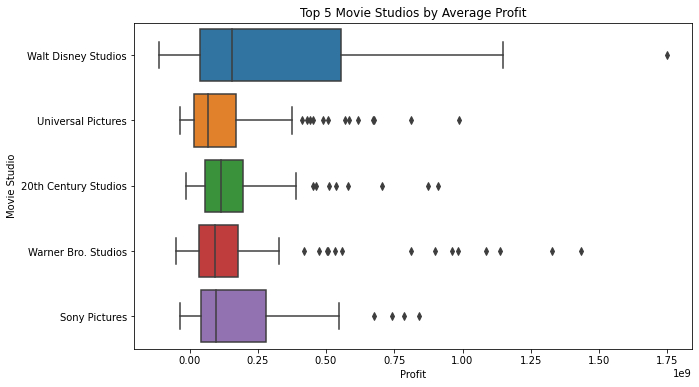

In [111]:
plt.figure(figsize = (10,6))
studio = sns.boxplot(x = df_top["p_l"], y = "studio",
           data = df_top)
plt.title("Top 5 Movie Studios by Average Profit");
plt.xlabel("Profit");
plt.ylabel("Movie Studio")
studio.set_yticklabels(['Walt Disney Studios', 'Universal Pictures', '20th Century Studios', 'Warner Bro. Studios', 'Sony Pictures']);
plt.savefig('Studio Profit.png')

In [104]:
df_genres = df_tn_imdb_bom.groupby(['primary_genre', 'sub_genre'])[['domestic_gross_x', 'worldwide_gross']].sum()
df_genres

domestic_gross_x  worldwide_gross
primary_genre sub_genre                                   
-             -              7.576467e+07     1.971157e+08
Action        -              1.924279e+07     1.360678e+08
              Adventure      2.373033e+10     6.752230e+10
              Animation      3.298462e+08     8.007930e+08
              Biography      5.650173e+08     1.159346e+09
...                                   ...              ...
Music         -              3.419967e+06     9.082906e+06
Mystery       Sci-Fi         2.062536e+08     4.135377e+08
              Thriller       1.280129e+08     2.994618e+08
Romance       Sci-Fi         6.249564e+07     1.269313e+08
Thriller      -              2.038778e+08     6.015481e+08

[74 rows x 2 columns]

In [105]:
df_genres = df_genres.sort_values('worldwide_gross', ascending = False).head(5)
df_genres

,,domestic_gross_x,worldwide_gross
primary_genre,sub_genre,,
Action,Adventure,2.373033e+10,6.752230e+10
Adventure,Animation,8.564307e+09,2.448489e+10
Action,Crime,2.321522e+09,6.683098e+09
Biography,Drama,3.127733e+09,6.282374e+09
Comedy,Drama,3.318236e+09,5.944456e+09


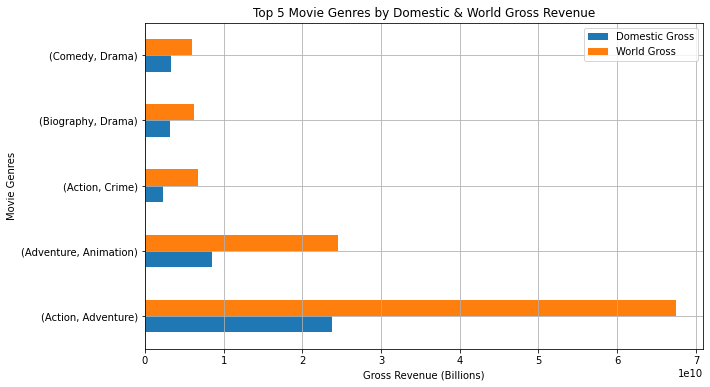

<Figure size 720x432 with 0 Axes>

In [106]:
rcParams['figure.figsize'] = 10,6
df_genres.plot(kind='barh')
plt.grid(True)
plt.xlabel("Gross Revenue (Billions)");
plt.ylabel("Movie Genres");
plt.title("Top 5 Movie Genres by Domestic & World Gross Revenue");
plt.legend(['Domestic Gross', 'World Gross'])
plt.show()
plt.savefig('Rev by Genre.png')

In [107]:
df_month = df_tn_imdb_bom.groupby(['release_month'])[['domestic_gross_x', 'worldwide_gross']].sum()
df_month

,domestic_gross_x,worldwide_gross
release_month,,
1,2.889442e+09,6.487401e+09
2,4.749513e+09,1.082649e+10
3,5.205291e+09,1.234789e+10
4,4.244034e+09,1.184594e+10
5,7.350347e+09,2.022381e+10
6,1.028742e+10,2.627131e+10
7,8.473080e+09,2.278331e+10
8,4.638831e+09,9.736435e+09
9,3.736718e+09,8.411203e+09


In [108]:
df_month = df_month.rename(index={1: 'Jan', 2: 'Feb',3: 'Mar', 4: 'Apr', 5: 'May', 6: 'Jun', 7: 'Jul', 8: 'Aug', 9: 'Sep', 10: 'Oct', 11: 'Nov', 12: 'Dec'})

In [109]:
df_month

,domestic_gross_x,worldwide_gross
release_month,,
Jan,2.889442e+09,6.487401e+09
Feb,4.749513e+09,1.082649e+10
Mar,5.205291e+09,1.234789e+10
Apr,4.244034e+09,1.184594e+10
May,7.350347e+09,2.022381e+10
Jun,1.028742e+10,2.627131e+10
Jul,8.473080e+09,2.278331e+10
Aug,4.638831e+09,9.736435e+09
Sep,3.736718e+09,8.411203e+09


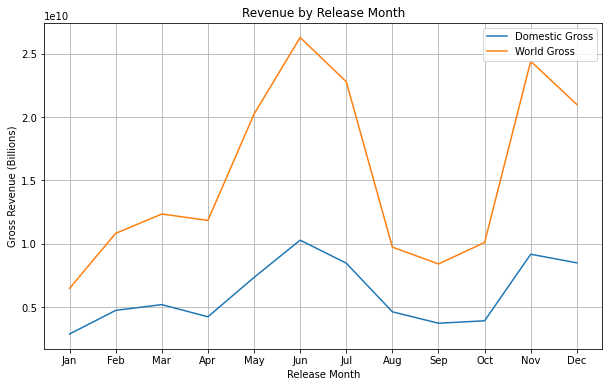

In [110]:
rcParams['figure.figsize'] = 10,6
plt.plot(df_month)
plt.grid(True)
plt.title('Revenue by Release Month')
plt.xlabel('Release Month')
plt.ylabel('Gross Revenue (Billions)')
plt.legend(['Domestic Gross', 'World Gross'])
plt.savefig('Rev by Release Month.png')

## Evaluation
From the published results it was clear that Microsoft would benefit from;

1. Approaching the Top 5 movie productions to explore partnership opportunities.
2. Primarily explore developing Action/Adventure movies followed by animated adventure movies.
3. Releasing the movies June or November to fit in with the current box office release patterns.

***
Questions to consider:
* How do you interpret the results?
* How well does your model fit your data? How much better is this than your baseline model?
* How confident are you that your results would generalize beyond the data you have?
* How confident are you that this model would benefit the business if put into use?
***

## Conclusions
The evaluation has identified profitable movie studios and high gross revenue returns however this would require expensive investment. There is also a possibility that established movie studios may not be interested in partnership opportunities. It is suggested Microsoft would benefit from further data analysis. Examples may include exploring smaller budget and/or foreign film markets as this may still yield attractive profits.

***
Questions to consider:
* What would you recommend the business do as a result of this work?
* What are some reasons why your analysis might not fully solve the business problem?
* What else could you do in the future to improve this project?
***